## **Introduction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam, Adagrad, Nadam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#data path
data_path = "/content/drive/MyDrive/DSC 101/Data/"

In [ ]:
data = pd.read_csv(data_path +'esg_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Close,MACD,RSI,VIX,USDX,EFFR,UNRATE,UMCSENT,Volatility,SR
0,2013-01-02,124.11,-0.445508,69.046151,14.68,79.849998,0.17,8.0,73.8,3.140429,0.549320
1,2013-01-03,123.87,-0.618582,66.940960,14.56,80.430000,0.17,8.0,73.8,3.115492,0.603473
2,2013-01-04,124.44,-0.792603,69.490158,13.83,80.500000,0.16,8.0,73.8,3.106101,0.735961
3,2013-01-07,124.04,-0.888003,65.406341,13.79,80.260002,0.16,8.0,73.8,3.128793,0.662759
4,2013-01-08,123.70,-0.925504,61.841891,13.62,80.349998,0.15,8.0,73.8,3.140427,0.535954


In [ ]:
data['Date'] = data['Unnamed: 0']
data.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
data = data.set_index('Date')

In [ ]:
data.head()

,Close,MACD,RSI,VIX,USDX,EFFR,UNRATE,UMCSENT,Volatility,SR
Date,,,,,,,,,,
2013-01-02,124.11,-0.445508,69.046151,14.68,79.849998,0.17,8.0,73.8,3.140429,0.549320
2013-01-03,123.87,-0.618582,66.940960,14.56,80.430000,0.17,8.0,73.8,3.115492,0.603473
2013-01-04,124.44,-0.792603,69.490158,13.83,80.500000,0.16,8.0,73.8,3.106101,0.735961
2013-01-07,124.04,-0.888003,65.406341,13.79,80.260002,0.16,8.0,73.8,3.128793,0.662759
2013-01-08,123.70,-0.925504,61.841891,13.62,80.349998,0.15,8.0,73.8,3.140427,0.535954


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 2013-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       2264 non-null   float64
 1   MACD        2264 non-null   float64
 2   RSI         2264 non-null   float64
 3   VIX         2264 non-null   float64
 4   USDX        2264 non-null   float64
 5   EFFR        2264 non-null   float64
 6   UNRATE      2264 non-null   float64
 7   UMCSENT     2264 non-null   float64
 8   Volatility  2264 non-null   float64
 9   SR          2264 non-null   float64
dtypes: float64(10)
memory usage: 194.6+ KB


## **Data Visualization**

- Plot the timeseries graph for the response variable (such as close price) and lower triangular correlation matrix.

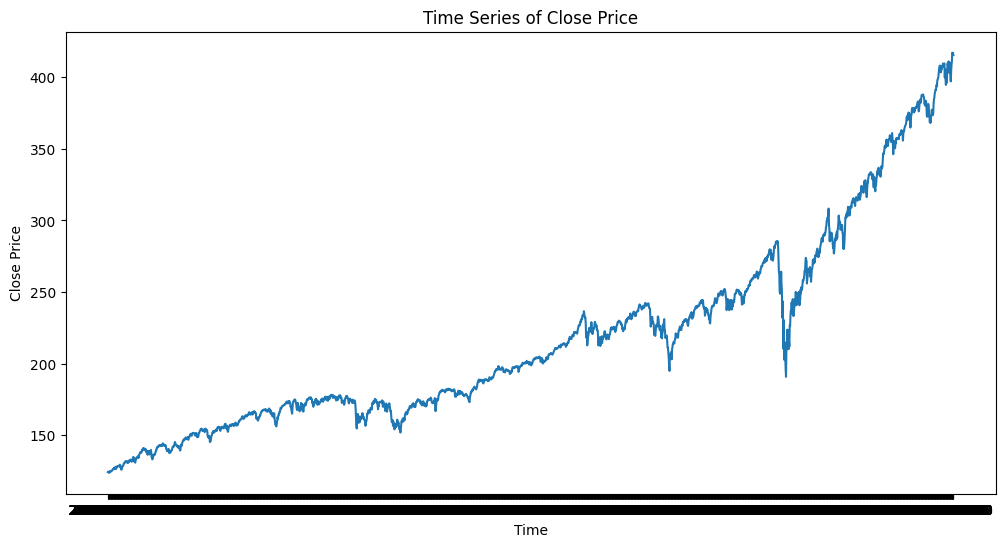

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Time Series of Close Price')
plt.show()

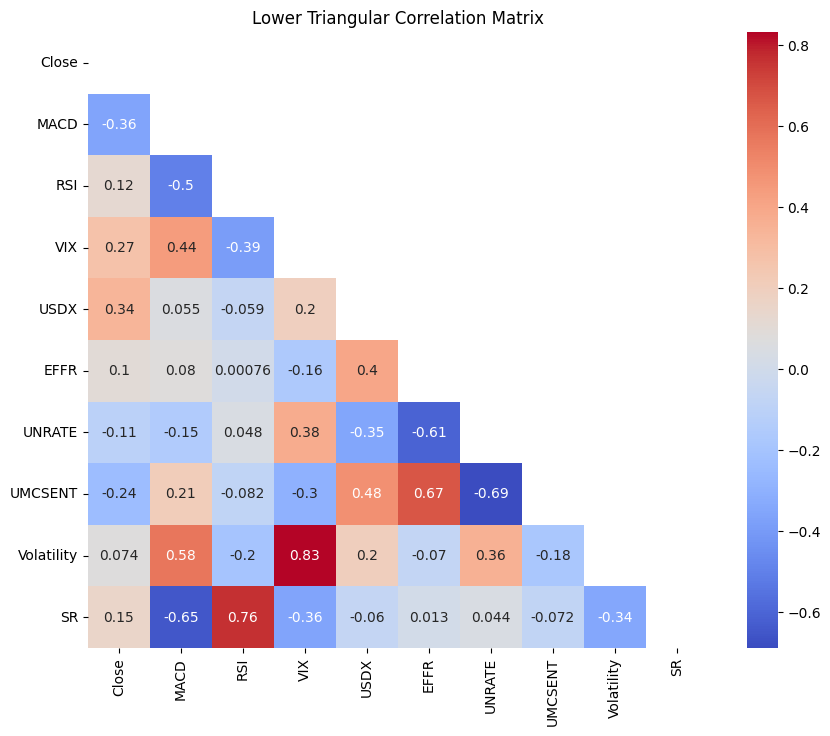

In [ ]:
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm')
plt.title('Lower Triangular Correlation Matrix')
plt.show()

## **Data Normalization, Dimension Reduction using PCA, & Input Preparation**

In [ ]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(data)


In [ ]:
X_norm.shape

(2264, 10)

In [ ]:
pca = PCA(n_components=0.95)

In [ ]:
X = pca.fit_transform(X_norm)
X = pca.transform(X_norm)
y=data['Close'].values

In [ ]:
X.shape

(2264, 7)

In [ ]:
y.shape

(2264,)

In [ ]:
def InputOutputCreation(dataX,datay, seq_len = 5):
    # dataX and datay are arrays
   X, y = [], []
   for i in range(len(dataX)- seq_len -1):
         a = dataX[i:(i+ seq_len), ]
         X.append(a)
         y.append(datay[i + seq_len])
   return np.array(X), np.array(y)

In [ ]:
X,y=InputOutputCreation(X,y, seq_len = 5)

In [ ]:
X[0]

array([[ 0.17108201,  2.602689  , -1.72034031,  0.90675539,  0.76327049,
        -0.33318638, -0.45632269],
       [ 0.14954154,  2.57618816, -1.68474322,  0.84066189,  0.65547134,
        -0.38802043, -0.36463451],
       [-0.07169255,  2.65731555, -1.619912  ,  0.96183166,  0.65451032,
        -0.34645245, -0.35984074],
       [ 0.05639088,  2.60961548, -1.71153956,  0.77752254,  0.61548558,
        -0.44975612, -0.3087767 ],
       [ 0.20576471,  2.53361238, -1.80272847,  0.58697478,  0.54619505,
        -0.51000616, -0.33449783]])

In [ ]:
y=y.reshape(len(y),1)
y.shape

(2258, 1)

In [ ]:
def data_split(X, split = 0.2):
  #======= creating training and test data===#
  l1   = int(len(X) * (1- split))
  l2    = len(X) - l1
  train  = X[0:l1]
  test   = X[l1:len(X)]
  return train, test

In [ ]:
X_train,X_test=data_split(X, split = 0.2)
y_train,y_test=data_split(y, split = 0.2)

In [ ]:
X_train.shape

(1806, 5, 7)

In [ ]:
y_train[0]

array([123.95])

## **Model Building**

In [ ]:
def build_lstm_model(neurons,  optimizer='Adam', learning_rate=0.001, verbose=0):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(5, 7), return_sequences=True))
    model.add(LSTM(neurons))
    model.add(Dense(1, activation='linear'))
    opt = None
    if optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'Adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'Nadam':
        opt = Nadam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=opt)
    if verbose == 1:
        print(model.summary())
    return model

In [ ]:
def build_gru_model(neurons, optimizer='Adam', learning_rate=0.001, verbose=0):
    model = Sequential()
    model.add(GRU(neurons, input_shape=(5,7), return_sequences=True))
    model.add(GRU(neurons))
    model.add(Dense(1, activation='linear'))
    opt = None
    if optimizer == 'Adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'Adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'Nadam':
        opt = Nadam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=opt)
    if verbose == 1:
        print(model.summary())
    return model

## **Hyperparameter Tuning**

###**Hyperparameter Tuning Function**

In [ ]:
def hyperparameter_tuning(model_type, neurons, selected_opt,num_replicates=2,epochs=10):
    best_model = None
    best_avg_rmse = 99999999999

    optimizer = selected_opt
    learning_rates = [0.1, 0.01, 0.001]
    batch_sizes = [4, 8, 16]

    for lr in learning_rates:
        for batch_size in batch_sizes:
            if optimizer == 'Adam':
                opt = Adam(learning_rate=lr)
            elif optimizer == 'Adagrad':
                opt = Adagrad(learning_rate=lr)
            else:
                opt = Nadam(learning_rate=lr)
            avg_rmse = 0.0

            for i in range(num_replicates):
                print("Running for", model_type, "with", neurons, "neurons,", optimizer, "optimizer,", lr, "learning rate,", batch_size, "batch size, and replicate", i, "\n")

                if model_type == 'LSTM':
                    model = build_lstm_model(neurons,  optimizer=optimizer, learning_rate=lr, verbose=0)
                else:
                    model = build_gru_model(neurons,  optimizer=optimizer, learning_rate=lr, verbose=0)

                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                y_pred = model.predict(X_test)
                rmse = math.sqrt(mean_squared_error(y_test, y_pred))
                print("RMSE: ", rmse)
                avg_rmse += rmse

            avg_rmse /= num_replicates

            if avg_rmse < best_avg_rmse:
                best_avg_rmse = avg_rmse
                best_model = model
                best_optimizer = optimizer
                best_learning_rate = lr
                best_batch_size = batch_size

    print("Best Model:", model_type)
    print("Best Average RMSE:", best_avg_rmse)
    print("Best Optimizer:", best_optimizer)
    print("Best Learning Rate:", best_learning_rate)
    print("Best Batch Size:", best_batch_size)

    return best_model

In [ ]:
# Select only the first 5 features of X_train and X_test
X_train = X_train[:, :, :5]
X_test = X_test[:, :, :5]

### **Models with 10 Neurons**

####LSTM (10)

In [ ]:
best_lstm_models_10_adam = hyperparameter_tuning('LSTM', 10,  'Adam')
#Best Model: LSTM
#Best Average RMSE: 155.48721361213697
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 16

In [ ]:
best_lstm_models_10_adagrad = hyperparameter_tuning('LSTM', 10, 'Adagrad')
#Best Model: LSTM
#Best Average RMSE: 311.57263664588413
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_lstm_models_10_nadam = hyperparameter_tuning('LSTM', 10, 'Nadam')
#Best Model: LSTM
#Best Average RMSE: 142.68095383350018
#Best Optimizer: Nadam
#Best Learning Rate: 0.1
#Best Batch Size: 8

####Best LSTM Optimizer (10)

In [ ]:
best_lstm_model_10 = []

model_result1 = float(input("Best RMSE for 10 Neuron LSTM Adam: ")) #155.48721361213697
best_lstm_model_10.append(model_result1)
model_result2 = float(input("Best RMSE for 10 Neuron LSTM Adagrad: "))  #311.57263664588413
best_lstm_model_10.append(model_result2)
model_result3 = float(input("Best RMSE for 10 Neuron LSTM Nadam: "))  #142.68095383350018
best_lstm_model_10.append(model_result3)

best_lstm_10 = min(best_lstm_model_10)

if best_lstm_10 == best_lstm_model_10[0]:
    print("The best model for 10 neurons uses the Adam optimizer.")
elif best_lstm_10 == best_lstm_model_10[1]:
    print("The best model for 10 neurons uses the Adagrad optimizer.")
elif best_lstm_10 == best_lstm_model_10[2]:
    print("The best model for 10 neurons uses the Nadam optimizer.")

Best RMSE for 10 Neuron LSTM Adam: 155.48721361213697
Best RMSE for 10 Neuron LSTM Adagrad: 311.57263664588413
Best RMSE for 10 Neuron LSTM Nadam: 142.68095383350018
The best model for 10 neurons uses the Nadam optimizer.


####GRU (10)

In [ ]:
best_gru_models_10_adam = hyperparameter_tuning('GRU', 10,  'Adam')
#Best Model: GRU
#Best Average RMSE: 171.36243631449022
#Best Optimizer: Adam
#Best Learning Rate: 0.01
#Best Batch Size: 4

In [ ]:
best_gru_models_10_adagrad = hyperparameter_tuning('GRU', 10,  'Adagrad')
#Best Model: GRU
#Best Average RMSE: 324.04125858280855
#Best Optimizer: Adagrad
#Best Learning Rate: 0.01
#Best Batch Size: 4

In [ ]:
best_gru_models_10_nadam = hyperparameter_tuning('GRU', 10,'Nadam')
#Best Model: GRU
#Best Average RMSE: 158.7877275115537
#Best Optimizer: Nadam
#Best Learning Rate: 0.01
#Best Batch Size: 4

####Best GRU Optimizer (10)

In [ ]:
best_gru_model_10 = []

model_result1 = float(input("Best RMSE for 10 Neuron GRU Adam: ")) #171.36243631449022
best_gru_model_10.append(model_result1)
model_result2 = float(input("Best RMSE for 10 Neuron GRU Adagrad: "))  #324.04125858280855
best_gru_model_10.append(model_result2)
model_result3 = float(input("Best RMSE for 10 Neuron GRU Nadam: "))  #158.7877275115537
best_gru_model_10.append(model_result3)

best_gru_10 = min(best_gru_model_10)

if best_gru_10 == best_gru_model_10[0]:
    print("The best model for 10 neurons uses the Adam optimizer.")
elif best_gru_10 == best_gru_model_10[1]:
    print("The best model for 10 neurons uses the Adagrad optimizer.")
elif best_gru_10 == best_gru_model_10[2]:
    print("The best model for 10 neurons uses the Nadam optimizer.")

Best RMSE for 10 Neuron GRU Adam: 171.36243631449022
Best RMSE for 10 Neuron GRU Adagrad: 324.04125858280855
Best RMSE for 10 Neuron GRU Nadam: 158.7877275115537
The best model for 10 neurons uses the Nadam optimizer.


### **Models with 30 Neurons**

####LSTM (30)

In [ ]:
best_lstm_models_30_adam = hyperparameter_tuning('LSTM', 30,  'Adam')
#Best Model: LSTM
#Best Average RMSE: 162.44231177565382
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 8

In [ ]:
best_lstm_models_30_adagrad = hyperparameter_tuning('LSTM', 30, 'Adagrad')
#Best Model: LSTM
#Best Average RMSE: 262.9979513488638
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_lstm_models_30_nadam = hyperparameter_tuning('LSTM', 30, 'Nadam')
#Best Model: LSTM
#Best Average RMSE: 148.99000663959598
#Best Optimizer: Nadam
#Best Learning Rate: 0.1
#Best Batch Size: 8

####Best LSTM Optimizer (30)

In [ ]:
best_lstm_model_30 = []

model_result1 = float(input("Best RMSE for 30 Neuron LSTM Adam: ")) #162.44231177565382
best_lstm_model_30.append(model_result1)
model_result2 = float(input("Best RMSE for 30 Neuron LSTM Adagrad: "))  #262.9979513488638
best_lstm_model_30.append(model_result2)
model_result3 = float(input("Best RMSE for 30 Neuron LSTM Nadam: "))  #148.99000663959598
best_lstm_model_30.append(model_result3)

best_lstm_30 = min(best_lstm_model_30)

if best_lstm_30 == best_lstm_model_30[0]:
    print("The best model for 30 neurons uses the Adam optimizer.")
elif best_lstm_30 == best_lstm_model_30[1]:
    print("The best model for 30 neurons uses the Adagrad optimizer.")
elif best_lstm_30 == best_lstm_model_30[2]:
    print("The best model for 30 neurons uses the Nadam optimizer.")

Best RMSE for 30 Neuron LSTM Adam: 162.44231177565382
Best RMSE for 30 Neuron LSTM Adagrad: 262.9979513488638
Best RMSE for 30 Neuron LSTM Nadam: 148.99000663959598
The best model for 30 neurons uses the Nadam optimizer.


####GRU (30)

In [ ]:
best_gru_models_30_adam = hyperparameter_tuning('GRU', 30,  'Adam')
#Best Model: GRU
#Best Average RMSE: 176.21543890232704
#Best Optimizer: Adam
#Best Learning Rate: 0.01
#Best Batch Size: 4

In [ ]:
best_gru_models_30_adagrad = hyperparameter_tuning('GRU', 30,  'Adagrad')
#Best Model: GRU
#Best Average RMSE: 296.2097561677226
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_gru_models_30_nadam = hyperparameter_tuning('GRU', 30,'Nadam')
#Best Model: GRU
#Best Average RMSE: 172.27813856841678
#Best Optimizer: Nadam
#Best Learning Rate: 0.01
#Best Batch Size: 4

####Best GRU Optimizer (30)

In [ ]:
best_gru_model_30 = []

model_result1 = float(input("Best RMSE for 30 Neuron GRU Adam: "))  #176.21543890232704
best_gru_model_30.append(model_result1)
model_result2 = float(input("Best RMSE for 30 Neuron GRU Adagrad: ")) #296.2097561677226
best_gru_model_30.append(model_result2)
model_result3 = float(input("Best RMSE for 30 Neuron GRU Nadam: ")) #172.27813856841678
best_gru_model_30.append(model_result3)

best_gru_30 = min(best_gru_model_30)

if best_gru_30 == best_gru_model_30[0]:
    print("The best model for GRU of 30 neurons uses the Adam optimizer.")
elif best_gru_30 == best_gru_model_30[1]:
    print("The best model for GRU of 30 neurons uses the Adagrad optimizer.")
elif best_gru_30 == best_gru_model_30[2]:
    print("The best model for GRU of 30 neurons uses the Nadam optimizer.")

Best RMSE for 30 Neuron GRU Adam: 176.21543890232704
Best RMSE for 30 Neuron GRU Adagrad: 296.2097561677226
Best RMSE for 30 Neuron GRU Nadam: 172.27813856841678
The best model for GRU of 30 neurons uses the Nadam optimizer.


### **Models with 50 Neurons**

####LSTM (50)

In [ ]:
best_lstm_models_50_adam = hyperparameter_tuning('LSTM', 50,  'Adam')
#Best Model: LSTM
#Best Average RMSE: 142.4504570307747
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 8

In [ ]:
best_lstm_models_50_adagrad = hyperparameter_tuning('LSTM', 50, 'Adagrad')
#Best Model: LSTM
#Best Average RMSE: 256.7541159386036
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_lstm_models_50_nadam = hyperparameter_tuning('LSTM', 50,  'Nadam')
#Best Model: LSTM
#Best Average RMSE: 156.99712404150438
#Best Optimizer: Nadam
#Best Learning Rate: 0.1
#Best Batch Size: 16

####Best LSTM Optimizer (50)

In [ ]:
best_lstm_model_50 = []

model_result1 = float(input("Best RMSE for 50 Neuron LSTM Adam: ")) #142.4504570307747
best_lstm_model_50.append(model_result1)
model_result2 = float(input("Best RMSE for 50 Neuron LSTM Adagrad: "))  #256.7541159386036
best_lstm_model_50.append(model_result2)
model_result3 = float(input("Best RMSE for 50 Neuron LSTM Nadam: "))  #156.99712404150438
best_lstm_model_50.append(model_result3)

best_lstm_50 = min(best_lstm_model_50)

if best_lstm_50 == best_lstm_model_50[0]:
    print("The best model for 50 neurons uses the Adam optimizer.")
elif best_lstm_50 == best_lstm_model_50[1]:
    print("The best model for 50 neurons uses the Adagrad optimizer.")
elif best_lstm_50 == best_lstm_model_50[2]:
    print("The best model for 50 neurons uses the Nadam optimizer.")

Best RMSE for 50 Neuron LSTM Adam: 142.4504570307747
Best RMSE for 50 Neuron LSTM Adagrad: 256.7541159386036
Best RMSE for 50 Neuron LSTM Nadam: 156.99712404150438
The best model for 50 neurons uses the Adam optimizer.


####GRU (50)

In [ ]:
best_gru_models_50_adam = hyperparameter_tuning('GRU', 50,  'Adam')
#Best Model: GRU
#Best Average RMSE: 192.2821991297576
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_gru_models_50_adagrad = hyperparameter_tuning('GRU', 50,  'Adagrad')
#Best Model: GRU
#Best Average RMSE: 275.5211954929883
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_gru_models_50_nadam = hyperparameter_tuning('GRU', 50,'Nadam')
#Best Model: GRU
#Best Average RMSE: 158.42462003623356
#Best Optimizer: Nadam
#Best Learning Rate: 0.01
#Best Batch Size: 4

####Best GRU Optimizer (50)

In [ ]:
best_gru_model_50 = []

model_result1 = float(input("Best RMSE for 50 Neuron GRU Adam: "))  #192.2821991297576
best_gru_model_50.append(model_result1)
model_result2 = float(input("Best RMSE for 50 Neuron GRU Adagrad: ")) #275.5211954929883
best_gru_model_50.append(model_result2)
model_result3 = float(input("Best RMSE for 50 Neuron GRU Nadam: ")) #158.42462003623356
best_gru_model_50.append(model_result3)

best_gru_50 = min(best_gru_model_50)

if best_gru_50 == best_gru_model_50[0]:
    print("The best model for GRU of 50 neurons uses the Adam optimizer.")
elif best_gru_50 == best_gru_model_50[1]:
    print("The best model for GRU of 50 neurons uses the Adagrad optimizer.")
elif best_gru_50 == best_gru_model_50[2]:
    print("The best model for GRU of 50 neurons uses the Nadam optimizer.")

Best RMSE for 50 Neuron GRU Adam: 192.2821991297576
Best RMSE for 50 Neuron GRU Adagrad: 275.5211954929883
Best RMSE for 50 Neuron GRU Nadam: 158.42462003623356
The best model for GRU of 50 neurons uses the Nadam optimizer.


### **Models with 100 Neurons**

####LSTM (100)

In [ ]:
best_lstm_models_100_adam = hyperparameter_tuning('LSTM', 100,  'Adam')
#Best Model: LSTM
#Best Average RMSE: 156.87732482995793
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_lstm_models_100_adagrad = hyperparameter_tuning('LSTM', 100, 'Adagrad')
#Best Model: LSTM
#Best Average RMSE: 229.28468121950863
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 8

In [ ]:
best_lstm_models_100_nadam = hyperparameter_tuning('LSTM', 100,  'Nadam')
#Best Model: LSTM
#Best Average RMSE: 119.15147336133055
#Best Optimizer: Nadam
#Best Learning Rate: 0.01
#Best Batch Size: 4

####Best LSTM Optimizer (100)

In [ ]:
best_lstm_model_100 = []

model_result1 = float(input("Best RMSE for 100 Neuron LSTM Adam: "))  #156.87732482995793
best_lstm_model_100.append(model_result1)
model_result2 = float(input("Best RMSE for 100 Neuron LSTM Adagrad: ")) #229.28468121950863
best_lstm_model_100.append(model_result2)
model_result3 = float(input("Best RMSE for 100 Neuron LSTM Nadam: ")) #119.15147336133055
best_lstm_model_100.append(model_result3)

best_lstm_100 = min(best_lstm_model_100)

if best_lstm_100 == best_lstm_model_100[0]:
    print("The best model for 100 neurons uses the Adam optimizer.")
elif best_lstm_100 == best_lstm_model_100[1]:
    print("The best model for 100 neurons uses the Adagrad optimizer.")
elif best_lstm_100 == best_lstm_model_100[2]:
    print("The best model for 100 neurons uses the Nadam optimizer.")

Best RMSE for 100 Neuron LSTM Adam: 156.87732482995793
Best RMSE for 100 Neuron LSTM Adagrad: 229.28468121950863
Best RMSE for 100 Neuron LSTM Nadam: 119.15147336133055
The best model for 100 neurons uses the Nadam optimizer.


####GRU (100)

In [ ]:
best_gru_models_100_adam = hyperparameter_tuning('GRU', 100, 'Adam')
#Best Model: GRU
#Best Average RMSE: 242.66564896913215
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 16

In [ ]:
best_gru_models_100_adagrad = hyperparameter_tuning('GRU', 100,  'Adagrad')
#Best Model: GRU
#Best Average RMSE: 224.55261235803272
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_gru_models_100_nadam = hyperparameter_tuning('GRU', 100, 'Nadam')

####Best GRU Optimizer (100)

In [ ]:
best_gru_model_100 = []

model_result1 = float(input("Best RMSE for 100 Neuron GRU Adam: ")) #242.66564896913215
best_gru_model_100.append(model_result1)
model_result2 = float(input("Best RMSE for 100 Neuron GRU Adagrad: "))  #224.55261235803272
best_gru_model_100.append(model_result2)
model_result3 = float(input("Best RMSE for 100 Neuron GRU Nadam: "))  #228.6857154643481
best_gru_model_100.append(model_result3)

best_gru_100 = min(best_gru_model_100)

if best_gru_100 == best_gru_model_100[0]:
    print("The best model for GRU of 100 neurons uses the Adam optimizer.")
elif best_gru_100 == best_gru_model_100[1]:
    print("The best model for GRU of 100 neurons uses the Adagrad optimizer.")
elif best_gru_100 == best_gru_model_100[2]:
    print("The best model for GRU of 100 neurons uses the Nadam optimizer.")

Best RMSE for 100 Neuron GRU Adam: 242.66564896913215
Best RMSE for 100 Neuron GRU Adagrad: 224.55261235803272
Best RMSE for 100 Neuron GRU Nadam: 228.6857154643481
The best model for GRU of 100 neurons uses the Adagrad optimizer.


### **Models with 150 Neurons**

####LSTM (150)

In [ ]:
best_lstm_models_150_adam = hyperparameter_tuning('LSTM', 150,  'Adam')
#Best Model: LSTM
#Best Average RMSE: 129.3791760222216
#Best Optimizer: Adam
#Best Learning Rate: 0.01
#Best Batch Size: 4

In [ ]:
best_lstm_models_150_adagrad = hyperparameter_tuning('LSTM', 150, 'Adagrad')
#Best Model: LSTM
#Best Average RMSE: 179.5527018451729
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_lstm_models_150_nadam = hyperparameter_tuning('LSTM', 150,  'Nadam')
#Best Model: LSTM
#Best Average RMSE: 131.9211405482529
#Best Optimizer: Nadam
#Best Learning Rate: 0.01
#Best Batch Size: 4

####Best LSTM Optimizer (150)

In [ ]:
best_lstm_model_150 = []

model_result1 = float(input("Best RMSE for 150 Neuron LSTM Adam: "))  #129.3791760222216
best_lstm_model_150.append(model_result1)
model_result2 = float(input("Best RMSE for 150 Neuron LSTM Adagrad: ")) #179.5527018451729
best_lstm_model_150.append(model_result2)
model_result3 = float(input("Best RMSE for 150 Neuron LSTM Nadam: ")) #131.9211405482529
best_lstm_model_150.append(model_result3)

best_lstm_150 = min(best_lstm_model_150)

if best_lstm_150 == best_lstm_model_150[0]:
    print("The best model for 150 neurons uses the Adam optimizer.")
elif best_lstm_150 == best_lstm_model_150[1]:
    print("The best model for 150 neurons uses the Adagrad optimizer.")
elif best_lstm_150 == best_lstm_model_150[2]:
    print("The best model for 150 neurons uses the Nadam optimizer.")

Best RMSE for 150 Neuron LSTM Adam: 129.3791760222216
Best RMSE for 150 Neuron LSTM Adagrad: 179.5527018451729
Best RMSE for 150 Neuron LSTM Nadam: 131.9211405482529
The best model for 150 neurons uses the Adam optimizer.


####GRU (150)

In [ ]:
best_gru_models_150_adam = hyperparameter_tuning('GRU', 150, 'Adam')
#Best Model: GRU
#Best Average RMSE: 226.68576617617623
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_gru_models_150_adagrad = hyperparameter_tuning('GRU', 150,'Adagrad')
#Best Model: GRU
#Best Average RMSE: 252.65691349234635
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 8

In [ ]:
best_gru_models_150_nadam = hyperparameter_tuning('GRU', 150, 'Nadam')
#Best Model: GRU
#Best Average RMSE: 228.31467602975036
#Best Optimizer: Nadam
#Best Learning Rate: 0.1
#Best Batch Size: 16

####Best GRU Optimizer (150)

In [ ]:
best_gru_model_150 = []

model_result1 = float(input("Best RMSE for 150 Neuron GRU Adam: ")) #226.68576617617623
best_gru_model_150.append(model_result1)
model_result2 = float(input("Best RMSE for 150 Neuron GRU Adagrad: "))  #252.65691349234635
best_gru_model_150.append(model_result2)
model_result3 = float(input("Best RMSE for 150 Neuron GRU Nadam: "))  #228.31467602975036
best_gru_model_150.append(model_result3)

best_gru_150 = min(best_gru_model_150)

if best_gru_150 == best_gru_model_150[0]:
    print("The best model for GRU of 150 neurons uses the Adam optimizer.")
elif best_gru_150 == best_gru_model_150[1]:
    print("The best model for GRU of 150 neurons uses the Adagrad optimizer.")
elif best_gru_150 == best_gru_model_150[2]:
    print("The best model for GRU of 150 neurons uses the Nadam optimizer.")

Best RMSE for 150 Neuron GRU Adam: 226.68576617617623
Best RMSE for 150 Neuron GRU Adagrad: 252.65691349234635
Best RMSE for 150 Neuron GRU Nadam: 228.31467602975036
The best model for GRU of 150 neurons uses the Adam optimizer.


### **Models with 200 Neurons**

####LSTM (200)

In [ ]:
best_lstm_models_200_adam = hyperparameter_tuning('LSTM', 200,  'Adam')
#Best Model: LSTM
#Best Average RMSE: 134.1104268081266
#Best Optimizer: Adam
#Best Learning Rate: 0.01
#Best Batch Size: 4

In [ ]:
best_lstm_models_200_adagrad = hyperparameter_tuning('LSTM', 200,  'Adagrad')
#Best Model: LSTM
#Best Average RMSE: 139.42041835364822
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 4

In [ ]:
best_lstm_models_200_nadam = hyperparameter_tuning('LSTM', 200, 'Nadam')
#Best Model: LSTM
#Best Average RMSE: 142.20779794125852
#Best Optimizer: Nadam
#Best Learning Rate: 0.01
#Best Batch Size: 4

####Best LSTM Optimizer (200)

In [ ]:
best_lstm_model_200 = []

model_result1 = float(input("Best RMSE for 200 Neuron LSTM Adam: "))  #134.1104268081266
best_lstm_model_200.append(model_result1)
model_result2 = float(input("Best RMSE for 200 Neuron LSTM Adagrad: ")) #139.42041835364822
best_lstm_model_200.append(model_result2)
model_result3 = float(input("Best RMSE for 200 Neuron LSTM Nadam: ")) #142.20779794125852
best_lstm_model_200.append(model_result3)

best_lstm_200 = min(best_lstm_model_200)

if best_lstm_200 == best_lstm_model_200[0]:
    print("The best model for 200 neurons uses the Adam optimizer.")
elif best_lstm_200 == best_lstm_model_200[1]:
    print("The best model for 200 neurons uses the Adagrad optimizer.")
elif best_lstm_200 == best_lstm_model_200[2]:
    print("The best model for 200 neurons uses the Nadam optimizer.")

Best RMSE for 200 Neuron LSTM Adam: 134.1104268081266
Best RMSE for 200 Neuron LSTM Adagrad: 139.42041835364822
Best RMSE for 200 Neuron LSTM Nadam: 142.20779794125852
The best model for 200 neurons uses the Adam optimizer.


####GRU (200)

In [ ]:
best_gru_models_200_adam = hyperparameter_tuning('GRU', 200, 'Adam')
#Best Model: GRU
#Best Average RMSE: 194.09689128469867
#Best Optimizer: Adam
#Best Learning Rate: 0.1
#Best Batch Size: 8

In [ ]:
best_gru_models_200_adagrad = hyperparameter_tuning('GRU', 200, 'Adagrad')
#Best Model: GRU
#Best Average RMSE: 226.6752014317824
#Best Optimizer: Adagrad
#Best Learning Rate: 0.1
#Best Batch Size: 8

In [ ]:
best_gru_models_200_nadam = hyperparameter_tuning('GRU', 200, 'Nadam')
#Best Model: GRU
#Best Average RMSE: 221.64650023223402
#Best Optimizer: Nadam
#Best Learning Rate: 0.1
#Best Batch Size: 8

####Best GRU Optimizer (200)

In [ ]:
best_gru_model_200 = []

model_result1 = float(input("Best RMSE for 200 Neuron GRU Adam: ")) #194.09689128469867
best_gru_model_200.append(model_result1)
model_result2 = float(input("Best RMSE for 200 Neuron GRU Adagrad: "))  #226.6752014317824
best_gru_model_200.append(model_result2)
model_result3 = float(input("Best RMSE for 200 Neuron GRU Nadam: "))  #221.64650023223402
best_gru_model_200.append(model_result3)

best_gru_200 = min(best_gru_model_200)

if best_gru_200 == best_gru_model_200[0]:
    print("The best model for GRU of 200 neurons uses the Adam optimizer.")
elif best_gru_200 == best_gru_model_200[1]:
    print("The best model for GRU of 200 neurons uses the Adagrad optimizer.")
elif best_gru_200 == best_gru_model_200[2]:
    print("The best model for GRU of 200 neurons uses the Nadam optimizer.")

Best RMSE for 200 Neuron GRU Adam: 194.09689128469867
Best RMSE for 200 Neuron GRU Adagrad: 226.6752014317824
Best RMSE for 200 Neuron GRU Nadam: 221.64650023223402
The best model for GRU of 200 neurons uses the Adam optimizer.


## **Best Model Selection**

###**Overall Best LSTM Model**

In [ ]:
#this works I just accidentally ran it!
best_lstm = [best_lstm_10, best_lstm_30, best_lstm_50, best_lstm_100, best_lstm_150, best_lstm_200]
best_lstm_n = min(best_lstm)
if best_lstm_n == best_lstm[0]:
    print("The best neurons for LSTM are 10. Refer to 10 neurons for hyperparameters.")
elif best_lstm_n == best_lstm[1]:
    print("The best neurons for LSTM are 30. Refer to 30 neurons for hyperparameters.")
elif best_lstm_n == best_lstm[2]:
    print("The best neurons for LSTM are 50. Refer to 50 neurons for hyperparameters.")
elif best_lstm_n == best_lstm[3]:
    print("The best neurons for LSTM are 100. Refer to 100 neurons for hyperparameters.")
elif best_lstm_n == best_lstm[4]:
    print("The best neurons for LSTM are 150. Refer to 150 neurons for hyperparameters.")
elif best_lstm_n == best_lstm[5]:
    print("The best neurons for LSTM are 200. Refer to 200 neurons for hyperparameters.")

NameError: ignored



```
# This is formatted as code
```

- The best performing LSTM model has the following hyperparameters, with 119.15 RMSE under 100 neurons:
  - Best Optimizer: Nadam
  - Best Learning Rate: 0.01
  - Best Batch Size: 4

###**Overall Best GRU Model**

In [ ]:
best_gru = [best_gru_10, best_gru_30, best_gru_50, best_gru_100, best_gru_150, best_gru_200]
best_gru_n = min(best_gru)
if best_gru_n == best_gru[0]:
    print("The best neurons for GRU are 10. Refer to 10 neurons section for hyperparameters.")
elif best_gru_n == best_gru[1]:
    print("The best neurons for GRU are 30. Refer to 30 neurons section for hyperparameters.")
elif best_gru_n == best_gru[2]:
    print("The best neurons for GRU are 50. Refer to 50 neurons section for hyperparameters.")
elif best_gru_n == best_gru[3]:
    print("The best neurons for GRU are 100. Refer to 100 neurons section for hyperparameters.")
elif best_gru_n == best_gru[4]:
    print("The best neurons for GRU are 150. Refer to 150 neurons section for hyperparameters.")
elif best_gru_n == best_gru[5]:
    print("The best neurons for GRU are 200. Refer to 200 neurons section for hyperparameters.")

- The best performing GRU model has the following hyperparameters, with 158.42 RMSE under 50 neurons:
  - Best Optimizer: Nadam
  - Best Learning Rate: 0.01
  - Best Batch Size: 4

###**Overall Best Model**

In [ ]:
best = [best_lstm_n, best_gru_n]
overall_best = min(best)
if overall_best == best[0]:
    print("The overall best model is the LSTM model. Refer to the Best LSTM Model Section for best neurons and hyperparameters.")
else:
    print("The overall best model is the GRU model. Refer to the Best GRU Model Section for best neurons and hyperparameters.")

- The overall best performing model is the LSTM model of 119.15 RMSE, with 100 neurons, Adagrad optimizer, 0.01 learning rate, and a batch size of 4.

## **Model Prediction**

- Run the best overall model and create the prediction plot for that model, with 30 replicates.

- For the overall best model, plot the prediction plot with true values and get other visualization as in the paper.

- The best performing LSTM model has the following hyperparameters, with 119.15 RMSE under 100 neurons:
  - Best Optimizer: Nadam
  - Best Learning Rate: 0.01
  - Best Batch Size: 4

In [ ]:
end_model = build_lstm_model(100, 'Nadam', 0.01)

In [ ]:
end_model.fit(X_train, y_train, epochs=50, batch_size=4)
y_pred = end_model.predict(X_test)

Epoch 1/50
452/452 [==============================] - 12s 14ms/step - loss: 7013.0801
Epoch 2/50
452/452 [==============================] - 11s 25ms/step - loss: 2031.6772
Epoch 3/50
452/452 [==============================] - 10s 21ms/step - loss: 137.3672
Epoch 4/50
452/452 [==============================] - 12s 27ms/step - loss: 78.4783
Epoch 5/50
452/452 [==============================] - 10s 22ms/step - loss: 53.3551
Epoch 6/50
452/452 [==============================] - 5s 12ms/step - loss: 30.3274
Epoch 7/50
452/452 [==============================] - 8s 17ms/step - loss: 28.0343
Epoch 8/50
452/452 [==============================] - 8s 18ms/step - loss: 24.6774
Epoch 9/50
452/452 [==============================] - 9s 20ms/step - loss: 24.1523
Epoch 10/50
452/452 [==============================] - 8s 19ms/step - loss: 23.5255
Epoch 11/50
452/452 [==============================] - 6s 14ms/step - loss: 19.8378
Epoch 12/50
452/452 [==============================] - 6s 13ms/step - loss:

In [ ]:
split_index = int(len(X) * (0.8))
sequence_length = 5

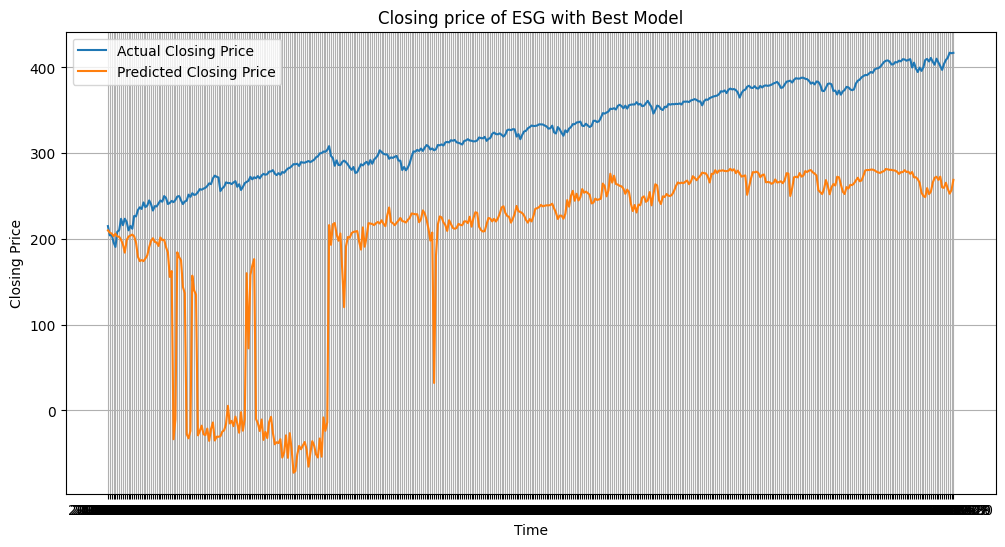

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(data.index[split_index + sequence_length+1:], y_test, label='Actual Closing Price')
plt.plot(data.index[split_index + sequence_length+1:], y_pred, label='Predicted Closing Price')
plt.title('Closing price of ESG with Best Model')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

def mean_absolute_percentage_error2(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/(y_true))*100)

def mean_absolute_percentage_error(y_true, y_pred):
    denominator = np.abs(y_true)
    mask = denominator > 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / denominator[mask])) * 100
    return mape
def calculate_scores(y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    R = np.corrcoef(y_true, y_pred)[0, 1]
    mape = mean_absolute_percentage_error(y_true, y_pred)

    # Check if R is a scalar
    if np.isscalar(R):
        R_value = R
    else:
        R_value = R[0, 1]

    dic = {'rmse': rmse, 'R': R_value, 'mape': mape}
    return dic
def calculate_scores2(y_true, y_pred):
  rmse = math.sqrt(mean_squared_error(y_true, y_pred))
  R = np.corrcoef(y_true, y_pred)[0, 1]
  mape = mean_absolute_percentage_error(y_true, y_pred)
  dic = {'rmse':rmse, 'R': R[0,1], 'mape': mape}
  return (dic)

In [ ]:
#========== Model hyper parameters settting ==========================#
def LSTM_model(neurons,  epochs = 50,  num_replicates = 30):

  num_features = X_train.shape[1]

  print("Progress: Building and training models.......\n")

  neurons = int(neurons)
  #============ arrays for collecting test scores ================#
  rmse_array = np.zeros(num_replicates)
  mape_array = np.zeros(num_replicates)
-0  R_array    = np.zeros(num_replicates)
  elapsed_time_array = np.zeros(num_replicates)


  #========== array for collecting history and predictions =======#
  models_history = []
  train_predictions = []
  test_predictions  = []



  #========== saving history and predictions per replicate=====#
  model_history_per_replicate = []
  train_predictions_per_replicate = []
  test_predictions_per_replicate  = []

  hidden_nodes = int(neurons)

  for k in range(0,num_replicates):

    print("Program is running for %d replicate ----->\n" %(k))

    model = build_lstm_model(100, 'Nadam', 0.01)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
    start = time.time()
    history = model.fit(X_train, y_train, batch_size = 4, epochs= epochs, callbacks=[callback], verbose = 1)
    end = time.time()
    elapsed_time = end - start

    model_history_per_replicate.append(history)

    train_pred   =  model.predict(X_train)
    test_pred    =  model.predict(X_test)

    train_predictions_per_replicate.append(train_pred)
    test_predictions_per_replicate.append(test_pred)

    #============== Calculating performance scores=========
    scores =   calculate_scores(y_test,test_pred)
    rmse_array[k] = scores['rmse']
    mape_array[k] =  scores['mape']
    R_array[k] = scores['R']
    elapsed_time_array[k] = elapsed_time

    models_history.append(model_history_per_replicate)
    train_predictions.append(train_predictions_per_replicate)
    test_predictions.append(test_predictions_per_replicate)

  print("Progress: Collecting outputs.......\n")

  neurons_df = pd.DataFrame([neurons])
  rmse_df = pd.DataFrame(rmse_array)
  mape_df  = pd.DataFrame(mape_array)
  R_df    = pd.DataFrame(R_array)
  elapsed_time_df =  pd.DataFrame(elapsed_time_array)

  train_predictions  = np.array(train_predictions)
  test_predictions   = np.array(test_predictions)

  # #==== Idendifying  the best model results based on rmse ===============#
  min_index = pd.DataFrame(rmse_df.min(axis = 1)).idxmin()[0]
  min_col = pd.DataFrame(rmse_df.min(axis=0)).idxmin().iloc[0]
  num_neurons_with_best_rmse = neurons_df.iloc[min_index, 0]
  best_rmse = rmse_df.iloc[min_index, min_col]
  mape_with_best_rmse = mape_df.iloc[min_index, min_col]
  R_with_best_rmse = R_df.iloc[min_index, min_col]
  elapsed_time_with_best_rmse = elapsed_time_df.iloc[min_index, min_col]

  train_predictions_with_best_rmse = train_predictions[min_index][min_col]
  test_predictions_with_best_rmse = test_predictions[min_index][min_col]

  loss_with_best_rmse = models_history[min_index][min_col].history['loss']
  #val_loss_with_best_rmse = models_history[min_index][min_col].history['val_loss']

  #======= Collecting hyperparameters=============#
  hyper_parameters = { 'neurons': neurons,
                       'epochs': epochs,
                       'num_replicates': num_replicates
                        }

  #======= Collecting test scores =============#
  scores = {'neurons': neurons_df, 'rmse': rmse_df, 'mape': mape_df, 'R': R_df, 'elapsed_time': elapsed_time_df}


  #======= Collecting the best model results =============#
  model_with_best_rmse = {  'neurons': num_neurons_with_best_rmse,
                            'replicate': min_col,
                            'rmse': best_rmse,
                            'mape': mape_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            'loss':loss_with_best_rmse,

                         }


  #======= Collecting all the outputs together =============#
   # output_dictionary = { 'hyper_parameters': hyper_parameters,
  output_dictionary = {'model_with_best_rmase':model_with_best_rmse,
                        'train_predictions': train_predictions,
                        'test_predictions':  test_predictions,
                        'models_history': models_history

                       }
  print("\nBest model (neurons, replicate, rmse): ", num_neurons_with_best_rmse, min_col, best_rmse)

  print("\nProgress: All works are done successfully, congratulations!!\n")

In [ ]:
model_output = LSTM_model(100, epochs = 2, num_replicates = 2)